[[13.68690607  1.1247451   7.79440439 14.3656044 ]
 [14.00419617  1.49300952  7.89139429 14.68995191]
 [ 8.24328573  6.725083    2.05165887 16.04868922]
 ...
 [ 9.8844095   5.78562427  1.78377189 16.57165075]
 [13.97368259  2.38275714  6.96334524 15.79933121]
 [13.42921624  2.14019982  6.53777874 15.52909093]]
[[14.61148845  0.51337079  6.86389142 13.85001227]
 [14.93160792  0.54163878  7.01174292 14.16604524]
 [ 9.17631955  6.89736328  0.92361203 15.88594795]
 ...
 [10.82391422  5.6812167   0.87853229 16.32853111]
 [14.91683629  1.08510242  6.25737548 15.30777698]
 [14.37272259  1.03201396  5.77517055 15.05868494]]


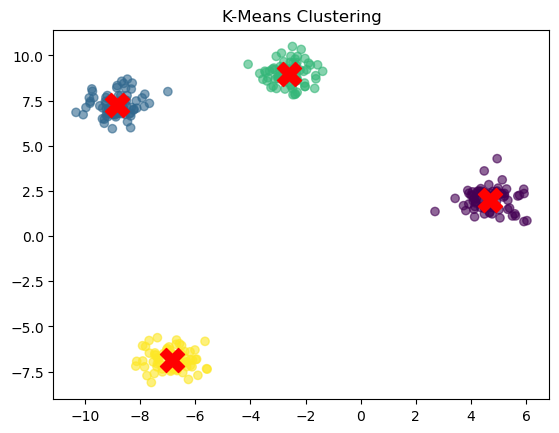

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Генериране на случайни данни
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
    
    def fit(self, X):
        # Инициализация на центроидите
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for _ in range(self.max_iters):
            # Намиране на най-близкия центроид за всяка точка
            labels = self._assign_clusters(X)
            
            # Преизчисляване на центроидите
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            
            # Ако центроидите не се променят, спираме итерацията
            if np.all(new_centroids == self.centroids):
                break
            
            self.centroids = new_centroids
        
        return labels
    
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

        print(distances)
        
        return np.argmin(distances, axis=1)

# Изпълнение на K-Means
kmeans = KMeans(k=4)
labels = kmeans.fit(X)

# Визуализация на резултатите
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()